In [3]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.ticker import MultipleLocator
from task import Task
from scheduling import SystemScheduling
from scheduling import JobExecution
#from ftp_rm_scheduling import get_ftp_rm_schedule

def set_limits_of_graph(sys_schedules : SystemScheduling, graph):
    graph.set_ylim(0, len(sys_schedules.tasks)*2 )
    graph.set_xlim(0, sys_schedules.feasibility_interval)
    
def get_list_of_colors():
    name = "tab10"
    cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
    return cmap.colors  # type: list
    
def set_axes_labels(gnt):
    gnt.set_xlabel('CPU Moments')
    gnt.set_ylabel('Tasks')
    
def set_x_ticks(gnt, time_limit):
    # Setting ticks on y-axis
    #major_ticks = np.arange(0, time_limit, 5)
    #minor_ticks = np.arange(0, time_limit, 1)
    #gnt.set_xticks(minor_ticks, )
    #gnt.set_xticks(major_ticks)
    #gnt.tick_params(which='minor', length=1)
    gnt.xaxis.set_minor_locator(MultipleLocator(1))

    # Initialize minor ticks
    #gnt.minorticks_on()
    
def set_y_ticks(gnt, tasks):
    tasks_len = len(tasks)
    #should update
    ticks = []
    labels = []
    for i in range(tasks_len):
        ticks.append(((i)*2))
        labels.append(i+1)
    

    # Now minor ticks exist and are turned on for both axes

    # Turn off x-axis minor ticks
    #gnt.yaxis.set_tick_params(which='minor', bottom=False)
    
    gnt.set_yticks(ticks)
    # Labelling tickes of y-axis
    gnt.set_yticklabels(labels)
# TODO to test


def draw_periods_for_task(task_index, task, gnt, time_limit, color, len_tasks):
    tasks_len = len_tasks
    task_index = (len_tasks - task_index)-1
    for i in range(task.offset+task.period, time_limit+1, task.period):
        
        
        
        max_i = 1 - ((task_index) * (1/tasks_len))
        min_i = max_i - 1/tasks_len
        gnt.axvline(x = i, ymin = min_i, ymax = max_i,
            color =color, linewidth = 4, alpha=0.50)
def draw_deadline_task(task_index, task, gnt, time_limit, color, len_tasks):
    tasks_len = len_tasks
    task_index = (len_tasks - task_index)-1
    for i in range(task.offset+task.deadline, time_limit+1, task.deadline):
        
        max_i = 1 - ((task_index) * (1/tasks_len))
        min_i = max_i - 1/tasks_len
        gnt.axvline(x = i, ymin = min_i, ymax = max_i,
            color =color, linestyle ="--", linewidth = 4)
        
def draw_job_execution(gnt, job_execution, color, task_index, is_deadline_missed):
    job_exe_t = job_execution.get_as_tuple()
    if is_deadline_missed:
        gnt.broken_barh([job_exe_t], (task_index*2,  1), facecolors=color, hatch='/', alpha=0.5, edgecolor='black', linewidth=4)
    else :
        gnt.broken_barh([job_exe_t], (task_index*2,  1), facecolors=color,edgecolor='black', linewidth=2)
    
def draw_job(gnt, job, color, task_index):
    
    is_deadline_missed = job.is_deadline_missed(50)
    
    for job_exe in job.job_executions:
        
        draw_job_execution(gnt, job_exe, color, task_index, is_deadline_missed)
        
def draw_task_scheduling(gnt, task, color, task_index):
    for job in task.jobs:
        draw_job(gnt, job, color, task_index)
    
        
def draw_system_scheduling(gnt, sys_sched, colors):
    for i, schedule in enumerate(reversed(sys_sched.schedules)):
        #print(schedule)
        draw_task_scheduling(gnt, schedule, colors[i], i)
        draw_periods_for_task(i, schedule.task, gnt, sys_sched.feasibility_interval, colors[i], len(sys_sched.tasks))
        draw_deadline_task(i, schedule.task, gnt, sys_sched.feasibility_interval, colors[i], len(sys_sched.tasks))
        #gnt.broken_barh(schedule, (i*2,  1), facecolors=colors[i])
  
# TODO clean this ugly code
# TODO use a schedules object
def gantt_of_schedule(sys_schedules, time_limit , filename="gant_diagram.png"):
    """Save a png of the gant diagram of the given schedule

    Args:
        schedules (array): the schedule to draw
        time_limit ([type]): the time limit of the graph
    """
    TASKS_HEIGHT = 1
    
    # Declaring a figure "gnt"
    fig, gnt = plt.subplots()
    
    schedules = sys_schedules.get_array_of_schedules()
    time_limit = sys_schedules.feasibility_interval
    set_limits_of_graph(sys_schedules, gnt)
    
    colors = get_list_of_colors()
    gnt.set_prop_cycle(color=colors)
    # Setting labels for x-axis and y-axis
    set_axes_labels(gnt)
    
    #add periods of T1
    period_of_t1 = sys_schedules.tasks[0].period

    set_x_ticks(gnt, time_limit)
    set_y_ticks(gnt, sys_schedules.tasks)
    # Setting graph attribute
    gnt.grid(True)
    #plt.style.use('classic')
    #after
    
    
    draw_system_scheduling(gnt, sys_schedules, colors)
    """
    for i, schedule in enumerate(reversed(schedules)):
        print(schedule)
        gnt.broken_barh(schedule, (i*2,  1), facecolors=colors[i])
    """
    #before
    """
    for i, schedule in enumerate(reversed(schedules)):
        #for j, task in enumerate(schedule):
        T = []
        for j, job in enumerate(schedule):
            tup = (job.start, job.nb_cpu_units)
            T.append(tup)
        gnt.broken_barh(T, (i*2,  1), facecolors=colors[i])
    """
    #fig(figsize=(30,2))
    fig.set_figwidth(12)
    fig.set_figheight(4)
    plt.savefig(filename)
    return plt
    


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy c-extensions failed.
- Try uninstalling and reinstalling numpy.
- If you have already done that, then:
  1. Check that you expected to use Python3.9 from "/usr/bin/python3.9",
     and that you have no directories in your PATH or PYTHONPATH that can
     interfere with the Python and numpy version "1.17.4" you're trying to use.
  2. If (1) looks fine, you can open a new issue at
     https://github.com/numpy/numpy/issues.  Please include details on:
     - how you installed Python
     - how you installed numpy
     - your operating system
     - whether or not you have multiple versions of Python installed
     - if you built from source, your compiler versions and ideally a build log

- If you're working with a numpy git repository, try `git clean -xdf`
  (removes all files not under version control) and rebuild numpy.

Note: this error has many possible causes, so please don't comment on
an existing issue about this - open a new one instead.

Original error was: No module named 'numpy.core._multiarray_umath'


In [ ]:
from scheduling import get_scheduling_course_first_exemple
from scheduling import get_scheduling_course_second_exemple
from scheduling import get_scheduling_deadline_missed

def ultimate_test():
    schedules = get_scheduling_course_first_exemple()
    schedules = get_scheduling_deadline_missed()
    #arr = schedules.get_array_of_schedules()
    gantt_of_schedule(schedules, 26, "second_course_example.png")

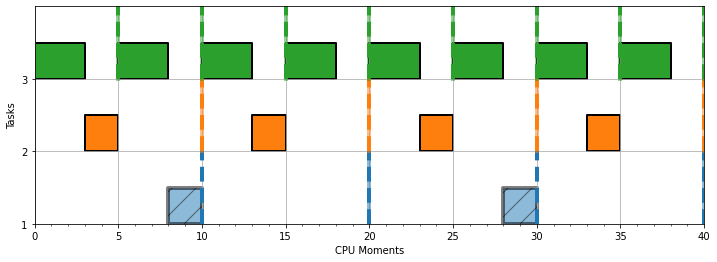

In [ ]:
ultimate_test()

In [ ]:
job_exe = JobExecution(0,5)
job_exe.get_as_tuple()



(0, 5)